 ***Importing Necessary Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

 ***Data Loading and Cleaning***

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Retail_sales.csv')

Saving Retail_sales.csv to Retail_sales.csv


In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


***Descriptive Statistics***

In [6]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [28]:
modes = df.mode().iloc[0]

# Print the mode for each column
print("Mode of each column:")
print(modes)

Mode of each column:
Transaction ID               1
Customer ID            CUST001
Gender                  Female
Age                       43.0
Product Category      Clothing
Quantity                   4.0
Price per Unit            50.0
Total Amount              50.0
6-Month MA          408.333333
Name: 0, dtype: object


In [7]:
df.dropna(inplace=True)

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
df['Total Amount'] = df['Quantity'] * df['Price per Unit']

***Time Series Analysis***

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.set_index('Date', inplace=True)

In [16]:
monthly_sales = df['Total Amount'].resample('M').sum()

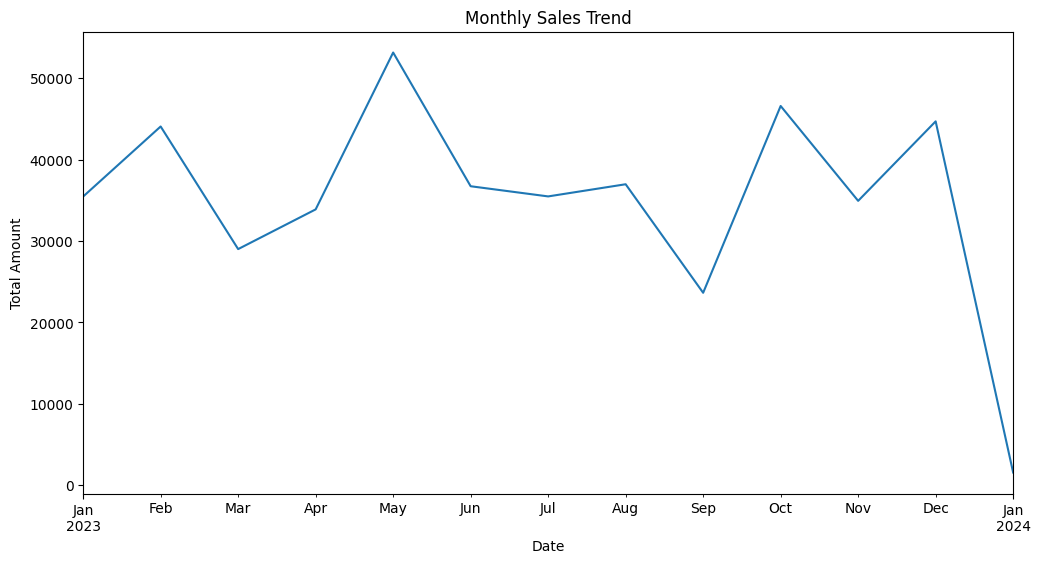

In [17]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(title='Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

In [18]:
df['6-Month MA'] = df['Total Amount'].rolling(window=6).mean()

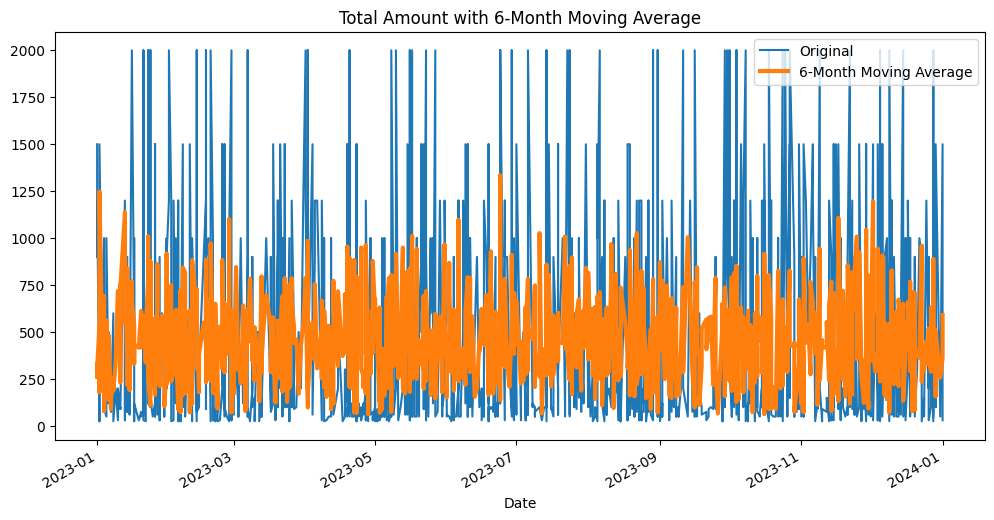

In [19]:
plt.figure(figsize=(12, 6))
df['Total Amount'].plot(label='Original')
df['6-Month MA'].plot(label='6-Month Moving Average', linewidth=3)
plt.title('Total Amount with 6-Month Moving Average')
plt.legend()
plt.show()

***Customer and Product Analysis***

In [20]:
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)

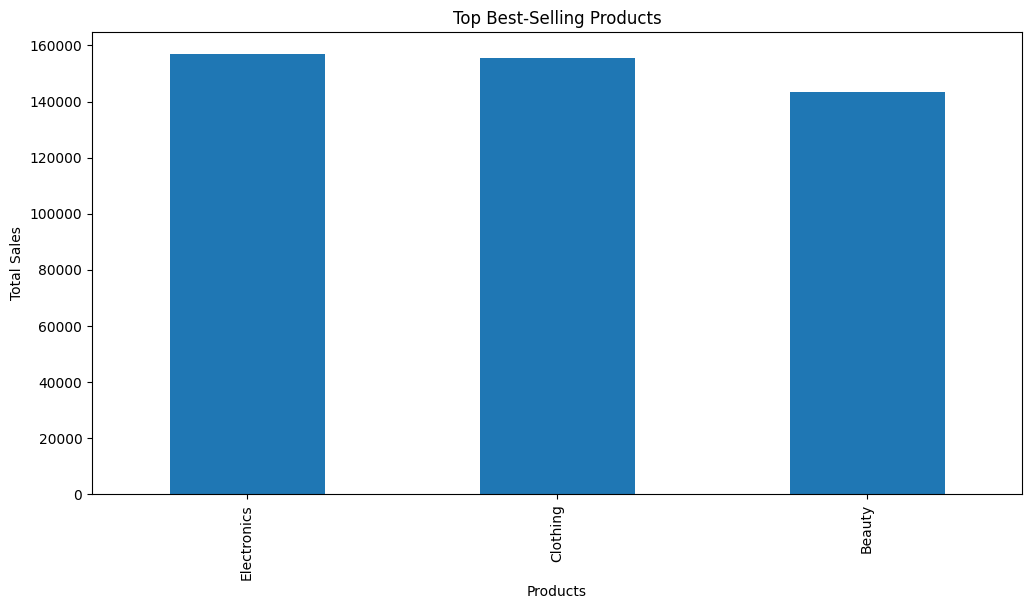

In [21]:
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', title='Top Best-Selling Products')
plt.xlabel('Products')
plt.ylabel('Total Sales')
plt.show()

In [22]:
low_performing_products = df.groupby('Product Category')['Total Amount'].sum().sort_values().head(10)

<ipython-input-23-788096f4d905>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_performing_products.index, y=low_performing_products.values, palette='coolwarm')


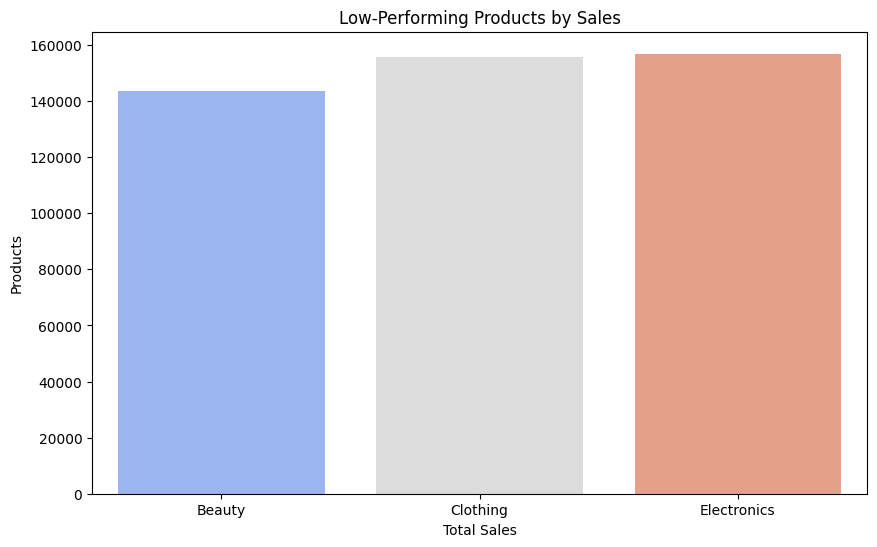

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x=low_performing_products.index, y=low_performing_products.values, palette='coolwarm')
plt.title('Low-Performing Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Products')
plt.show()

In [24]:
customer_spending = df.groupby('Customer ID')['Total Amount'].sum()

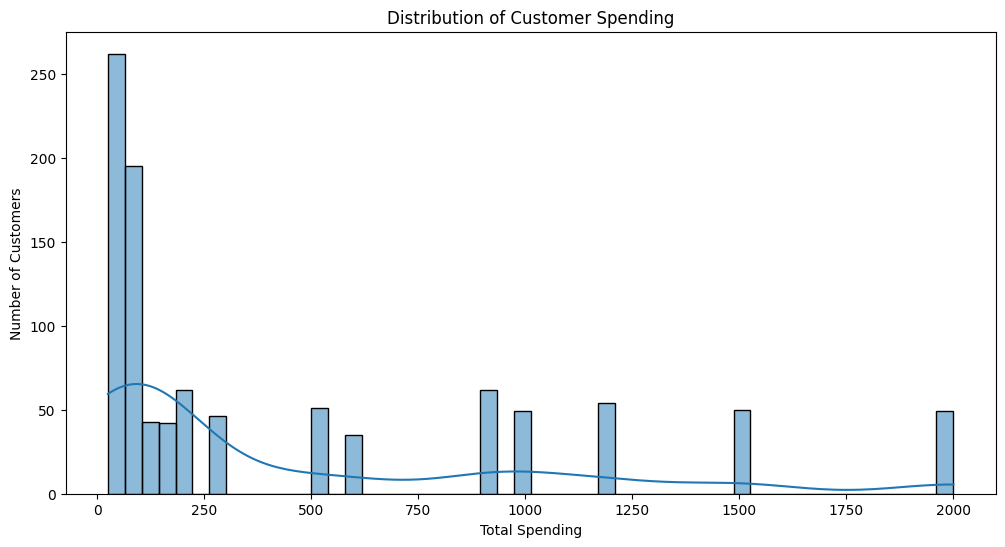

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(customer_spending, bins=50, kde=True)
plt.title('Distribution of Customer Spending')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.show()

***Correlation Analysis***

Below is the correlation heatmap to visualize relationships between numerical variables.

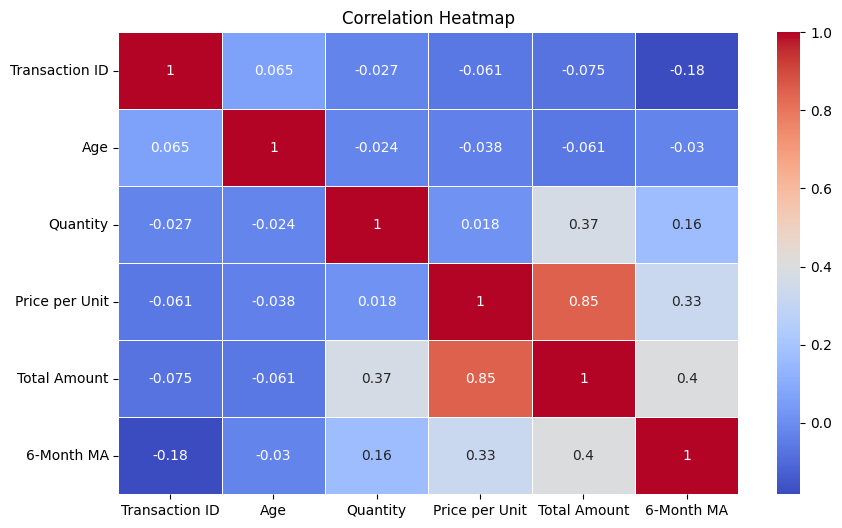

In [26]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

***Recommendations***

In [27]:
print("Recommendations based on EDA:")
print("\n1. Increase stock for top-selling products, especially during peak sales months.")
print("2. Implement targeted promotions for high-spending customer segments.")
print("3. Focus on underperforming regions or product categories. ")

Recommendations based on EDA:

1. Increase stock for top-selling products, especially during peak sales months.
2. Implement targeted promotions for high-spending customer segments.
3. Focus on underperforming regions or product categories. 
